# Init package

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Get data

In [20]:
df = pd.read_csv('https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/ML%20Pemula/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [22]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Eploratory Data Analysis (EDA)

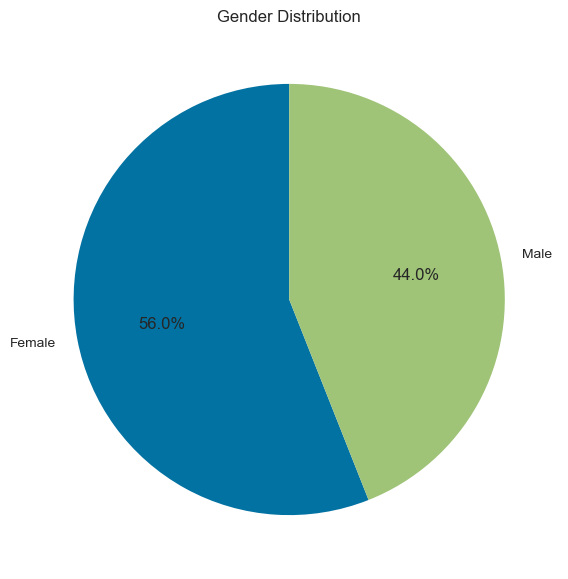

In [23]:
plt.figure(figsize=(7, 7))
plt.pie(df['Gender'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show()

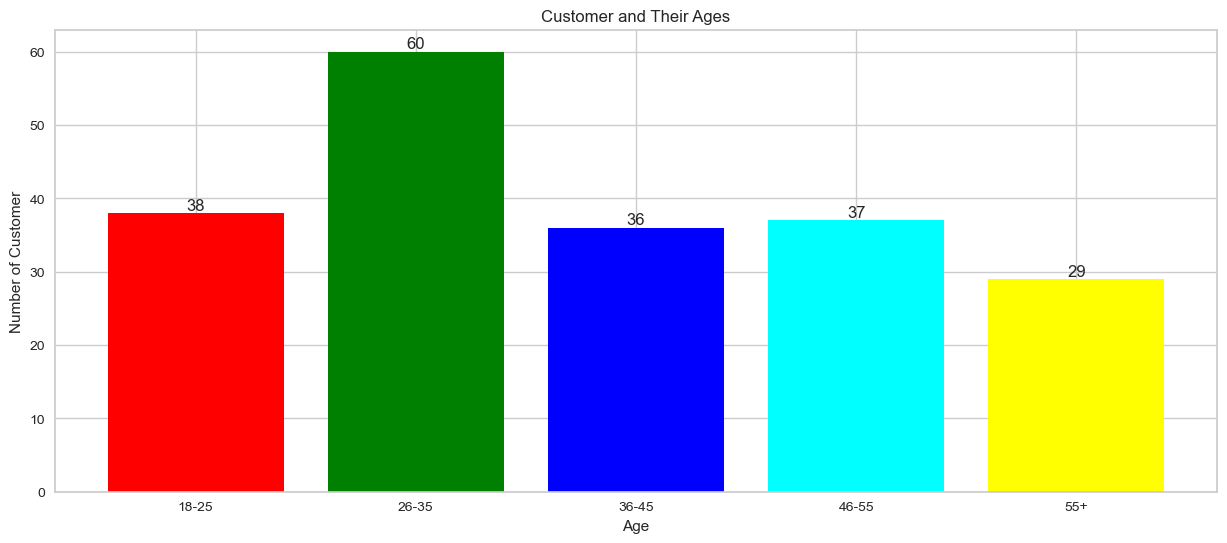

In [24]:
# grouping customer age to inside category and counting the number of customers in each category
age18_25 = df.Age[(df.Age >= 18) & (df.Age <= 25)]
age26_35 = df.Age[(df.Age >= 26) & (df.Age <= 35)]
age36_45 = df.Age[(df.Age >= 36) & (df.Age <= 45)]
age46_55 = df.Age[(df.Age >= 46) & (df.Age <= 55)]
age55above = df.Age[df.Age >= 56]

# compile data for plotting
x = ['18-25', '26-35', '36-45', '46-55', '55+']
y = [len(age18_25.values), len(age26_35.values), len(age36_45.values), len(age46_55.values), len(age55above.values)]

# create a bar plot for distribution of age customer
plt.figure(figsize=(15, 6))
plt.bar(x, y, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Customer and Their Ages')
plt.xlabel('Age')
plt.ylabel('Number of Customer')

# add label of total customer in each bar
for i in range(len(x)):
  plt.text(i, y[i], y[i], ha='center', va='bottom')
  
plt.show()

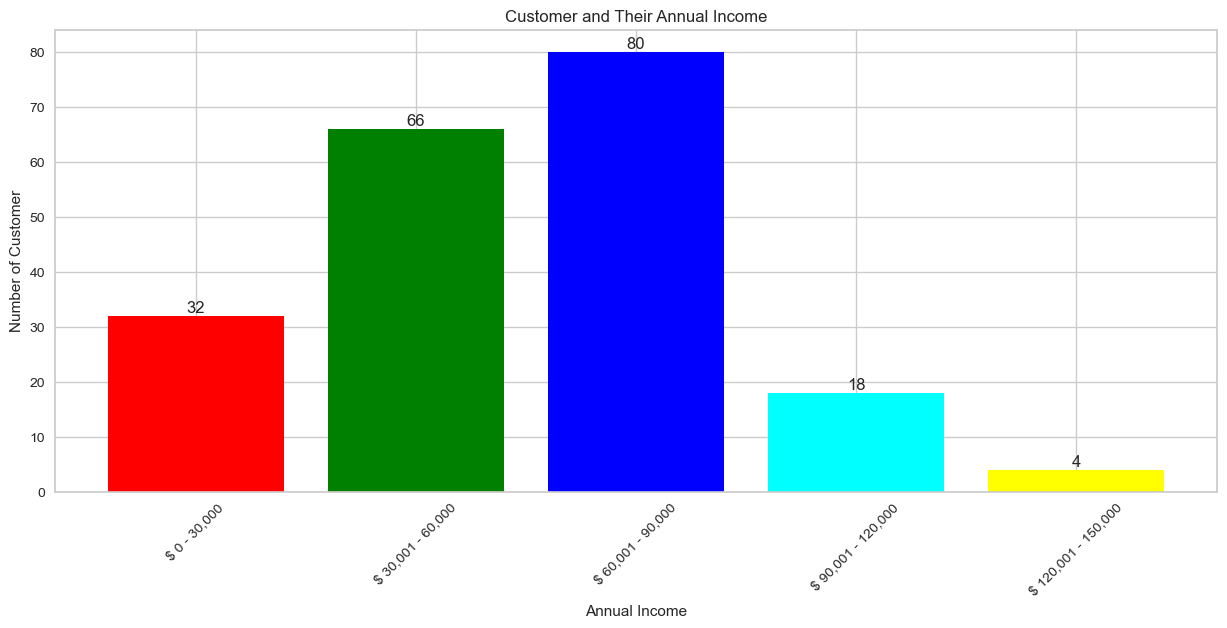

In [25]:
# grouping customer annual income inside category and counting the number of customers in each category
ai0_30 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 0) & (df['Annual Income (k$)'] <= 30)]
ai31_60 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 31) & (df['Annual Income (k$)'] <= 60)]
ai61_90 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 61) & (df['Annual Income (k$)'] <= 90)]
ai91_120 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 91) & (df['Annual Income (k$)'] <= 120)]
ai121_150 = df['Annual Income (k$)'][(df['Annual Income (k$)'] >= 121) & (df['Annual Income (k$)'] <= 150)]

# compile data for plotting
aix = ['$ 0 - 30,000', '$ 30,001 - 60,000', '$ 60,001 - 90,000', '$ 90,001 - 120,000', '$ 120,001 - 150,000']
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

# create bar chart for distribution of customer annual income
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title('Customer and Their Annual Income')
plt.xlabel('Annual Income')
plt.ylabel('Number of Customer')
plt.xticks(rotation=45)

for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
  
plt.show()

# Data Splitting

In [26]:
# get column annual income and spending score from dataset and assign it to variable x
X = df.iloc[:, [3, 4]].values

# show data distribution inside dataframe format with column name and appropriate column value
print(pd.DataFrame(X, columns=['Annual Income (k$)', 'Spending Score (1-100)']))

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


# Elbow Method

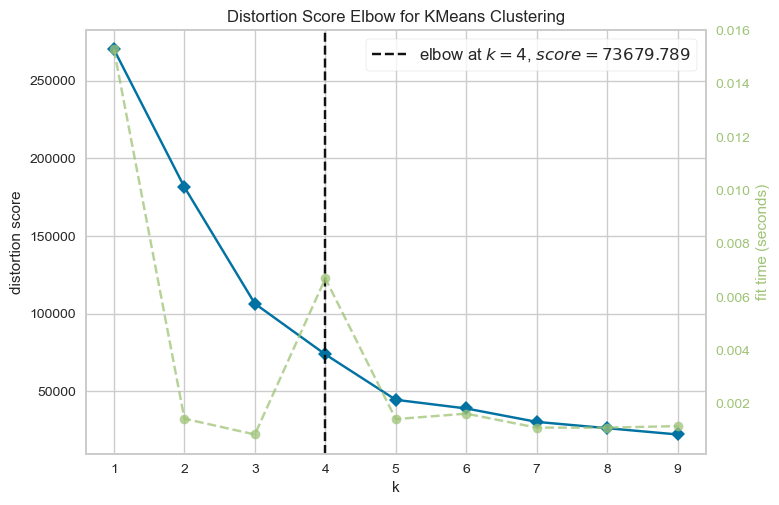

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [41]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1,10))
visualizer.fit(X)
visualizer.show()

# Cluster Modeling (K-Means Clustering)

In [52]:
from sklearn.cluster import KMeans

# init and train KMeans model with 4 cluster
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(X)

# get label cluster
labels = kmeans.labels_

# get total of cluster
k = 4

# function for analytics characteristic of cluster
def analyze_cluster(X, labels, k):
  print('Analisis Karakterisitik Setiap Cluster: ')
  for cluster_id in range(k):
    # get data for this cluster
    cluster_data = X[labels == cluster_id]
    
    # counting average for each feature inside cluster
    mean_income = cluster_data[:, 0].mean()
    mean_spending = cluster_data[:, 1].mean()
    
    print(f'\nCluster {cluster_id + 1}:')
    print(f'Rata-rata Annual Income (k$): {mean_income:.2f}')
    print(f'Rata-rata Spending Score (1-100): {mean_spending:.2f}')
  
analyze_cluster(X, labels, k)

Analisis Karakterisitik Setiap Cluster: 

Cluster 1:
Rata-rata Annual Income (k$): 48.26
Rata-rata Spending Score (1-100): 56.48

Cluster 2:
Rata-rata Annual Income (k$): 86.54
Rata-rata Spending Score (1-100): 82.13

Cluster 3:
Rata-rata Annual Income (k$): 87.00
Rata-rata Spending Score (1-100): 18.63

Cluster 4:
Rata-rata Annual Income (k$): 26.30
Rata-rata Spending Score (1-100): 20.91


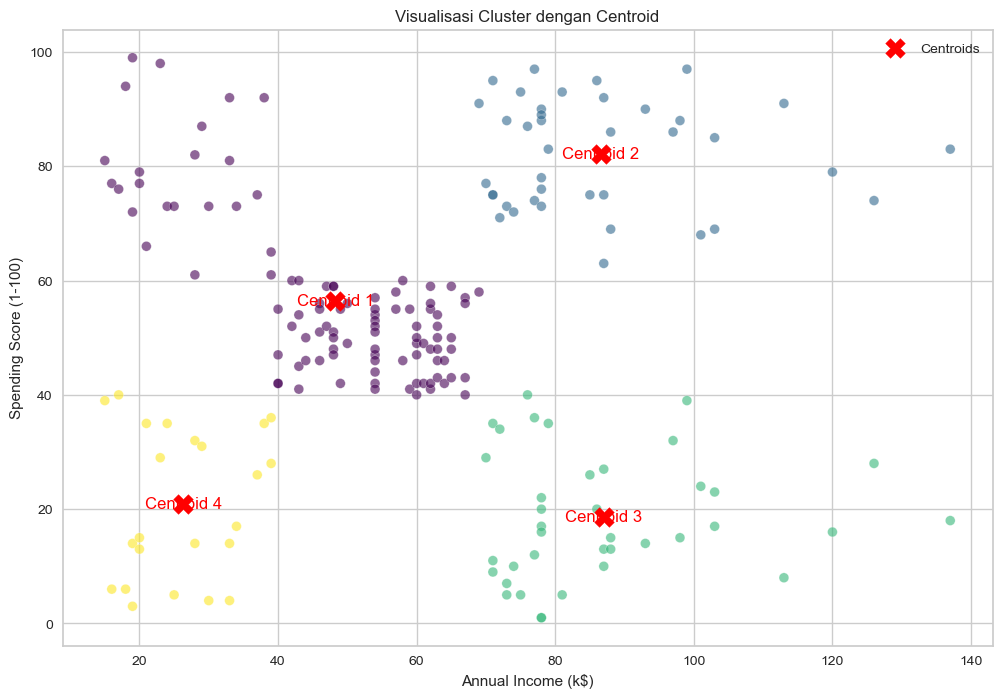

In [ ]:
import matplotlib.pyplot as plt

# determine position of cenroid
centroids = kmeans.cluster_centers_

plt.figure(figsize=(12, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')

for i, centroids in enumerate(centroids):
  plt.text(centroids[0], centroids[1], f'Centroid {i + 1}', color='red', fontsize=12, ha='center', va='center')
  
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

plt.show()